##CSE-221710313011-D.Manasa

##Segmentation of customers based on the purchase behaviour

##problem Statement:  
The aim of the project is to analyze the best set of Customers based on RFM so that the company can target its customers efficiently using rfm ,kmeans clustering and hierarchical clustering.

##DATASET DESCRIPTION
The dataset used for this project consists of 8 columns and their description is given below.

##Attribute Information:
-->InvoiceNo: 6-digit integer number uniquely assigned to each transaction. The letter ‘c’ at the start of InvoiceNo indicates a cancellation.  
-->StockCode: 5-digit integer number uniquely assigned to each distinct product.
-->Description: Product name  
-->Quantity: The quantities of each product (item) per transaction.  
-->InvoiceDate: The day and time when each transaction was generated.  
-->UnitPrice: Product price per unit in £ sterling.  
-->CustomerID: 5-digit integer number uniquely assigned to each customer.  
-->Country: The name of the country where each customer resides.  

##Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Checking the versions of the packages used
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.0.5
1.18.5
0.10.1


In [3]:
#Reading the dataset using pandas by G-drive
retail=pd.read_csv("/content/drive/My Drive/Summer Internship/ecommerce.csv",encoding="unicode_escape")

In [4]:
# converting invoiceDate to datetime
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate']) 

In [5]:
#To view our dataset
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
# Let's look top 10 rows
retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [7]:
#Let's look bottom 10 rows
retail.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
#Sanity Check
retail.shape#checking the number of rows and columns present
retail.describe()
retail.info()#checking the information about the data present
retail.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


(541909, 8)

In [9]:
# checking the data-types of the data
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

##Exploratory Data Analysis

In [10]:
#to check whether any null values are present or not
retail.isnull().values.any()
retail.isnull().values.sum()#to check the count of null values values
retail.isnull().sum()*100/retail.shape[0]

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

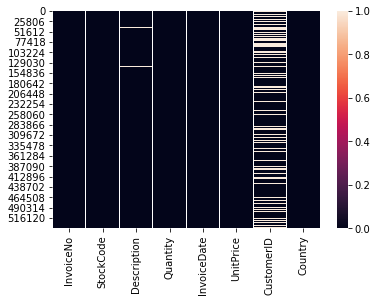

In [11]:
#visualizing the missing values by using heatmap
sns.heatmap(retail.isna())

Here , Whitespaces indicates the number of missing values.

Text(0.5, 1.0, 'Ratio of missing values per columns')

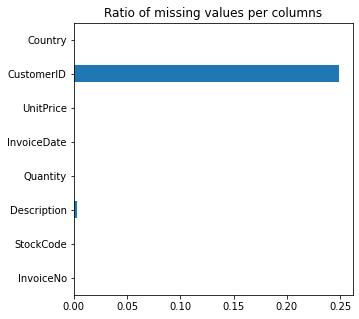

In [12]:
#Plotting bar graph to know the missing values
plt.figure(figsize=(5, 5))
retail.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

from the above bargraph the missing values are more in "CustomerId and Descripton".
so we have to drop these missing values by 'row wise'.

In [13]:
#Dropping the irrevalent values
order_wise = retail.dropna()

In [14]:
#retriving the data after dropping the column of null values
order_wise.shape
order_wise.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

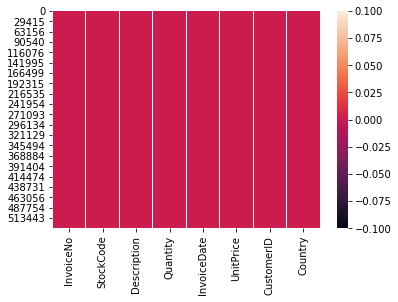

In [15]:
#visualizing the data by using heatmap after dropping the missing values
sns.heatmap(order_wise.isna())

from the above graph,we can clearly say that the are no missing values.

In [16]:
#To view the data with no missing values
order_wise.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#Data Cleaning/ Data Preprocessing:

In [17]:
#checking the number of duplicate entries
print('Duplicate Entries: {}'.format(order_wise.duplicated().sum()))

Duplicate Entries: 5225


In [18]:
# dropping values with duplicate entries
order_wise=order_wise.drop_duplicates() 
order_wise.shape

(401604, 8)

In [19]:
#checking the duplicate entries after dropping the duplicate entries
print('Duplicate Entries: {}'.format(order_wise.duplicated().sum()))

Duplicate Entries: 0


In [20]:
#to check the number of unique countries
order_wise.Country.nunique()

37

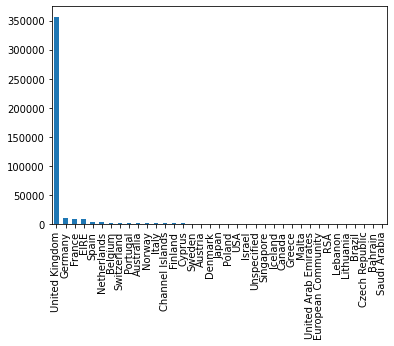

In [21]:
#to check the highest number of customer's from a country
order_wise.Country.value_counts()[:37].plot(kind='bar')

From the above graph we can observe that,the customers from "United kingdom" are more in number.

#RFM Analysis:
**For Behavioural Segmentation**

In [22]:
#RFM implementation

# Extracting amount by multiplying quantity and unit price and saving the data into amount variable.
amount  = pd.DataFrame(order_wise.Quantity * order_wise.UnitPrice, columns = ["Amount"])
amount.head()

,Amount
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34


In [23]:
#merging amount in order_wise
order_wise = pd.concat(objs = [order_wise,amount], axis = 1, ignore_index = False)

#Monetary Function
# Finding total amount spent per customer
monetary = order_wise.groupby("CustomerID").Amount.sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [24]:
#Frequency function
frequency = order_wise[['CustomerID', 'InvoiceNo']]

In [25]:
# Getting the count of orders made by each customer based on customer ID.
k = frequency.groupby("CustomerID").InvoiceNo.count()
k = pd.DataFrame(k)
k = k.reset_index()
k.columns = ["CustomerID", "Frequency"]
k.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [26]:
#Merging Amount and Frequency columns
#creating master dataset
master = monetary.merge(k, on = "CustomerID", how = "inner")
master.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [27]:
recency  = order_wise[['CustomerID','InvoiceDate']]
maximum = max(recency.InvoiceDate)

In [28]:
maximum

Timestamp('2011-12-09 12:50:00')

In [29]:
#Generating recency function

# Filtering data for customerid and invoice_date
recency  = order_wise[['CustomerID','InvoiceDate']]

# Finding max data
maximum = max(recency.InvoiceDate)

# Adding one more day to the max data, so that the max date will have 1 as the difference and not zero.
maximum = maximum + pd.DateOffset(days=1)
recency['grp'] = maximum - recency.InvoiceDate
recency.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,CustomerID,InvoiceDate,grp
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00


In [30]:
grp_region=recency.groupby('CustomerID')
grp_region.min()

,InvoiceDate,grp
CustomerID,,
12346.0,2011-01-18 10:01:00,326 days 02:33:00
12347.0,2010-12-07 14:57:00,2 days 20:58:00
12348.0,2010-12-16 19:09:00,75 days 23:37:00
12349.0,2011-11-21 09:51:00,19 days 02:59:00
12350.0,2011-02-02 16:01:00,310 days 20:49:00
...,...,...
18280.0,2011-03-07 09:52:00,278 days 02:58:00
18281.0,2011-06-12 10:53:00,181 days 01:57:00
18282.0,2011-08-05 13:35:00,8 days 01:07:00


In [31]:
#Dataframe merging by recency
df = pd.DataFrame(recency.groupby('CustomerID').grp.min())

In [32]:
df = df.reset_index()
df.columns = ["CustomerID", "Recency"]
df.head()

,CustomerID,Recency
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


In [33]:
#Combining all recency, frequency and monetary parameters
RFM = k.merge(monetary, on = "CustomerID")
RFM = RFM.merge(df, on = "CustomerID")
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
1,12347.0,182,4310.00,2 days 20:58:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00


## outlier treatment

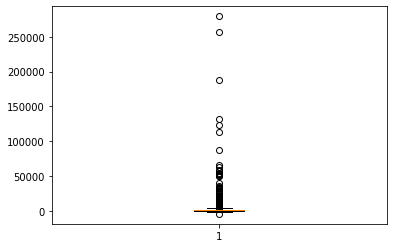

In [34]:
# outlier treatment for Amount
plt.boxplot(RFM.Amount)
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >= (Q1 - 1.5*IQR)) & (RFM.Amount <= (Q3 + 1.5*IQR))]

we got the amount values more than 2,50,000.

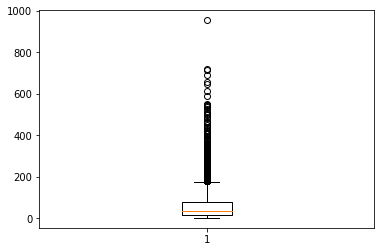

In [35]:
# outlier treatment for Frequency
plt.boxplot(RFM.Frequency)
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

we got the frequency values between 800-1000.

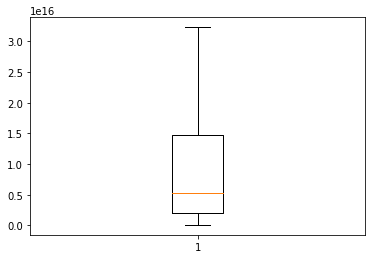

In [36]:
# outlier treatment for Recency
plt.boxplot(RFM.Recency)
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

we got the recency value above the 3.0.

In [37]:
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00
5,12352.0,95,1545.41,36 days 22:13:00


##K-Means clustering

In [38]:
# standardise all parameters
RFM_norm1 = RFM.drop(["CustomerID"], axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [39]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,-1.074138,-1.041762,2.137274
1,-0.370228,1.399756,-0.281781
2,0.649227,1.345838,-0.821490
3,-0.710046,-0.587486,1.983071
4,1.183227,1.057650,-0.657650


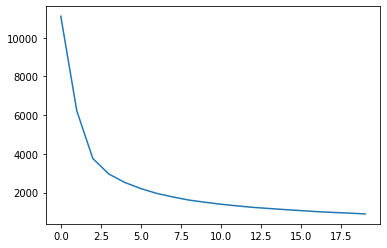

In [40]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

from the above graph we can observe that there are 3 deviations,so we are having 3 number of clusters.

In [41]:
# applying k-means clustering
model_clus3 = KMeans(n_clusters = 3, max_iter=50)# Kmeans with K=3
model_clus3.fit(RFM_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
##Silhouette Analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

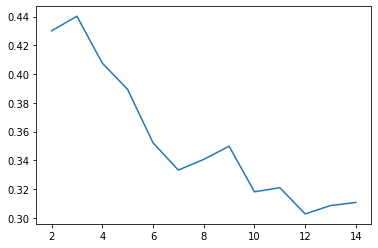

In [43]:
#plotting a linkage graph
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

From the above graph we can say that the average linkage is between 3-7.

In [44]:
pd.RangeIndex(len(RFM.index))

RangeIndex(start=0, stop=3702, step=1)

In [45]:
RFM_km = pd.concat([RFM, pd.Series(model_clus.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [46]:
RFM_km.head()

,CustomerID,Frequency,Amount,Recency,ClusterID
0,12346.0,2.0,0.00,326.0,19.0
1,NaN,NaN,NaN,NaN,1.0
2,12348.0,31.0,1797.24,75.0,18.0
3,12349.0,73.0,1757.55,19.0,19.0
4,12350.0,17.0,334.40,310.0,18.0


In [47]:
# analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [48]:
km_clusters_amount

,Amount
ClusterID,
0,234.136146
1,1494.298305
2,344.767408
3,2059.410084
4,457.562135
5,943.216759
6,2909.447761
7,596.388227
8,700.196802


In [49]:
RFM_km.head()

,CustomerID,Frequency,Amount,Recency,ClusterID
0,12346.0,2,0.00,326,19
1,12348.0,31,1797.24,75,1
2,12349.0,73,1757.55,19,18
3,12350.0,17,334.40,310,19
4,12352.0,95,1545.41,36,18


In [50]:
df = pd.concat([pd.Series([0,1,2]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ClusterID       3 non-null      float64
 1   Amount_mean     20 non-null     float64
 2   Frequency_mean  20 non-null     float64
 3   Recency_mean    20 non-null     float64
dtypes: float64(4)
memory usage: 800.0 bytes


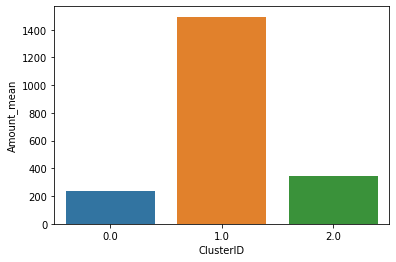

In [51]:
#plottiong the bar graph between cluserid and amount-mean
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

customers with clusterID 1 are the customers with the high amount of transactions as compared to other customers.

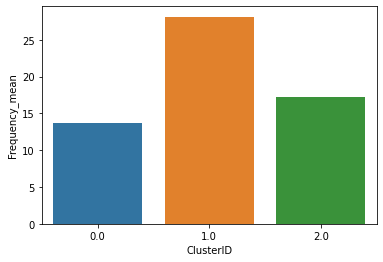

In [52]:
#plottiong the bar graph between cluserid and frequency_mean
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

Customers with ClusterID 1 are frequent buyers

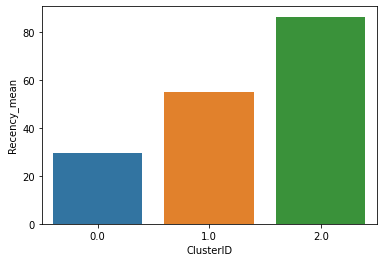

In [53]:
#plottiong the bar graph between cluserid and recency-mean
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

customers with ClusterID 2 is  a recent buyers and hence high  important from business point of view.

##Hierarchical clustering



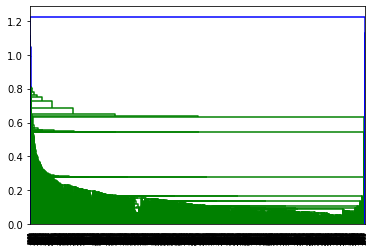

In [54]:
# heirarchical clustering
mergings = linkage(RFM_norm1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

from the above graph we can say that ,the above graph represents our dataset in this way in a hierarchical cluster.

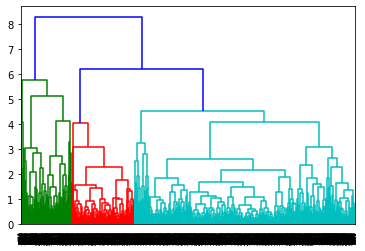

In [55]:
#plotting the dendrogram
mergings = linkage(RFM_norm1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Dendrograms are used to divide into multiple clusters dependeding upon the problem.

In [56]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
RFM_hc = pd.concat([RFM, clusterCut], axis=1)
RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [57]:
#summarise
RFM_hc.Recency = RFM_hc.Recency.dt.days
km_clusters_amount = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Recency.mean())

In [58]:
df = pd.concat([pd.Series([0,1,2]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,234.770072,14.840810,275.073806
1,1,666.123689,38.002461,68.297785
2,2,1837.121328,119.237347,51.136126


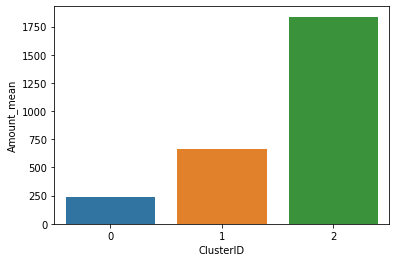

In [59]:
#plottiong the bar graph between cluserid and amount-mean
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

Customers with ClusterId 2 are the customers with high amount of transactions as compared to other customers.

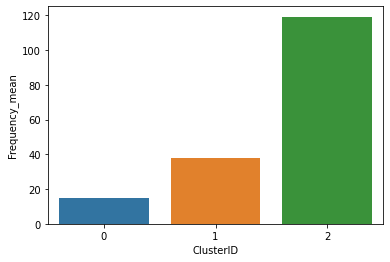

In [60]:
#plottiong the bar graph between cluserid and frequency-mean
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

Customers with ClusterId 2 are frequent buyers.

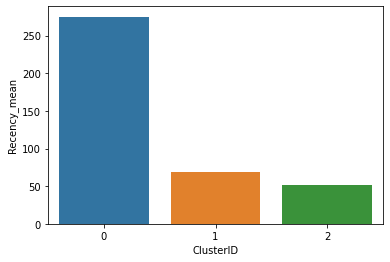

In [61]:
#plotting the bargraph between recency_mean and clusterid
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

Customers with ClusterID 0 are not recent buyers and hence least of importance from business point of view.

##conclusion:
By this we can conclude that,   
1.The customers with clusterid 0 has high amount of transactions  
2.The customers with clusterid 1 frequent buyers  
3.And,The Customers with cluster id 2has high recency mean, who are not the recent buyers  
hence these are very important segmentations which helpful  for business point of view for the companies.